# End Semester Examination

## Soham Sahasrabuddhe, 23B1848


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score, log_loss, mean_absolute_error,mean_squared_error
from sklearn.neural_network import MLPRegressor
from ucimlrepo import fetch_ucirepo

### Question 1

In [69]:
np.random.seed(int(time.time()))

In [87]:
x1 = np.linspace(-1, 1, 100)
rnd1 = np.random.rand(100)
rnd2 = np.random.rand(100) 

# Part (a)
x21_p = 2 * np.sqrt(1 - x1**2) + rnd1
x21_n = -2 * np.sqrt(1 - x1**2) + rnd1
x21 = np.concatenate((x21_p, x21_n))

# Part (b)
x22_p = 2 * np.sqrt(4 - x1**2) + 0.5*rnd2
x22_n = -2 * np.sqrt(4 - x1**2) + 0.5*rnd2
x22 = np.concatenate((x22_p, x22_n))

x1 = np.concatenate((x1,x1)) # Basically for plotting and consistency

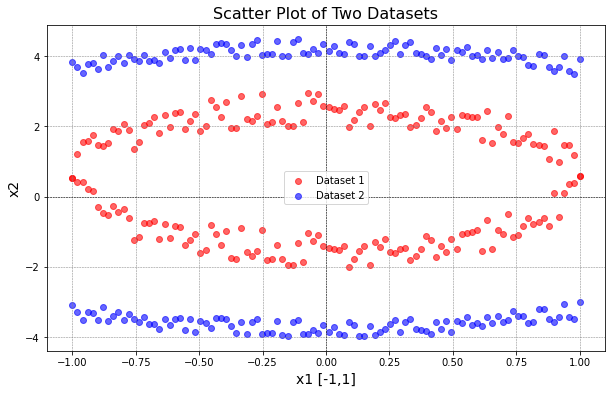

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(x1, x21, color='red', label='Dataset 1', alpha=0.6)
plt.scatter(x1, x22, color='blue', label='Dataset 2', alpha=0.6)

# labels and title
plt.xlabel('x1 [-1,1]', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.title('Scatter Plot of Two Datasets', fontsize=16)
#plt.xlim([-1, 1])
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

### Question 2

Part (a)

In [89]:
# Combining the dataset
x2 = np.concatenate((x21,x22))
x1 = np.concatenate((x1,x1))
X = np.vstack((x1,x2)).T

# Constructing the covariance matrix
cov_matrix = np.cov(X, rowvar = False)
print(cov_matrix)

[[ 0.34091964 -0.0140358 ]
 [-0.0140358   8.73159967]]


Part (b)

In [90]:
epsilon = float(input()) # User generated epsilon
print(epsilon)
# Using PCA function from sci-kit learn
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

# New Dataset and corresponding analysis
print(f' New Dataset = {Z}')

print(f'Principal Components of Analysis:\n{pca.components_}')
print(f'Explained Variance:\n{pca.explained_variance_}')

0.1
 New Dataset = [[-1.63871242e-01 -9.99727279e-01]
 [-8.44349676e-01 -9.78386940e-01]
 [-1.18831988e+00 -9.57609505e-01]
 [-1.23188287e+00 -9.37334585e-01]
 [-1.38645322e+00 -9.16873975e-01]
 [-1.10315262e+00 -8.97145826e-01]
 [-1.09075118e+00 -8.76964522e-01]
 [-1.16908603e+00 -8.56631437e-01]
 [-1.55362083e+00 -8.35786147e-01]
 [-1.50958005e+00 -8.15657769e-01]
 [-1.70923604e+00 -7.95121740e-01]
 [-1.54428533e+00 -7.75195617e-01]
 [-1.00696153e+00 -7.55892393e-01]
 [-1.18500735e+00 -7.35392513e-01]
 [-1.68827362e+00 -7.14348611e-01]
 [-1.74758510e+00 -6.94047348e-01]
 [-1.89862412e+00 -6.73592644e-01]
 [-1.43928728e+00 -6.54158965e-01]
 [-1.95715595e+00 -6.33090637e-01]
 [-1.61903641e+00 -6.13454188e-01]
 [-2.01574502e+00 -5.92588533e-01]
 [-2.03747370e+00 -5.72350137e-01]
 [-1.57573479e+00 -5.52920476e-01]
 [-1.79590756e+00 -5.32350127e-01]
 [-1.99348411e+00 -5.11817577e-01]
 [-1.52131923e+00 -4.92405356e-01]
 [-1.64625853e+00 -4.71994312e-01]
 [-2.40143832e+00 -4.50529014e-01]
 

### Question 3

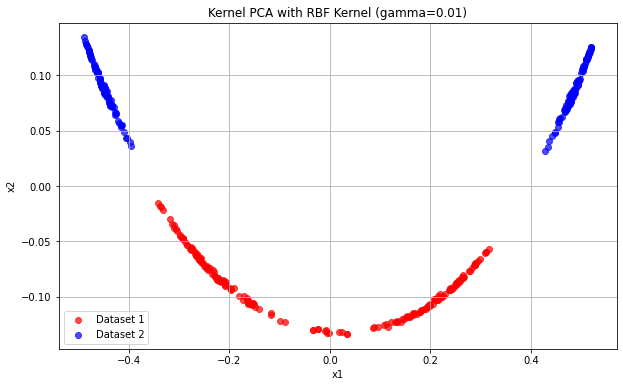

In [101]:
g = float(input()) # User input for gamma

Y = ['red'] * len(x21) + ['blue'] * len(x22)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=g)
X_kpca = kpca.fit_transform(X)

# Plotting corresponding figure
plt.figure(figsize=(10, 6))
plt.scatter(X_kpca[:200, 0], X_kpca[:200, 1], color='red', label='Dataset 1', alpha=0.7)
plt.scatter(X_kpca[200:, 0], X_kpca[200:, 1], color='blue', label='Dataset 2', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Kernel PCA with RBF Kernel (gamma={g})")
plt.legend()
plt.grid(True)
plt.show()

### Question 4

In [75]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data 
X = pd.DataFrame(wine.data.features)
y = pd.DataFrame(wine.data.targets)
  
# Features
print(X) 
  
# Target 
print(y) 

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

In [76]:
# Using One Hot encoder
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)
print(y_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

/home/soham10/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Question 5

In [77]:
# Splitting of Dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

In [78]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Part (a)

In [79]:
# Hyperparameter tuning for λ
lambdas = [0.001, 0.01, 0.1, 1, 10, 100] 
lambda_log_loss_pairs = []

for l in lambdas:
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1/l, max_iter=200) # Penalty 'l2' for ridge using lbfgs algo, saga can be used as well
    model.fit(X_train, np.argmax(y_train, axis=1))
    
    # Testing on validation set
    y_val_pred = model.predict_proba(X_val)
    val_log_loss = log_loss(y_val, y_val_pred)
    
    # Storing lambda and log loss error
    lambda_log_loss_pairs.append((l, val_log_loss))
    print(f"Lambda (λ): {l}, Validation Log Loss: {val_log_loss:.4f}")

# best lambda based on minimum validation log loss
best_lambda, best_log_loss = min(lambda_log_loss_pairs, key=lambda x: x[1])

X_combined = np.vstack((X_train, X_val))
y_combined = np.vstack((y_train, y_val))
final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1/best_lambda, max_iter=200)
final_model.fit(X_combined, np.argmax(y_combined, axis=1))

# Test set predictions and final log loss
y_test_pred = final_model.predict_proba(X_test)
test_log_loss = log_loss(y_test, y_test_pred)
print(f"\nBest Lambda: {best_lambda}, Test Log Loss: {test_log_loss:.4f}")


Lambda (λ): 0.001, Validation Log Loss: 0.1736
Lambda (λ): 0.01, Validation Log Loss: 0.1241
Lambda (λ): 0.1, Validation Log Loss: 0.0900
Lambda (λ): 1, Validation Log Loss: 0.0865
Lambda (λ): 10, Validation Log Loss: 0.1493
Lambda (λ): 100, Validation Log Loss: 0.3987

Best Lambda: 1, Test Log Loss: 0.0829


Part (b)

In [80]:
# Parameter Tuning
gamma_values = [0.01, 0.1, 1, 10]
best_gamma = None
best_mse = float('inf')

for gamma in gamma_values:
    model = KernelRidge(kernel='rbf', gamma=gamma) # Directly from scikit learn
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Error calculation
    val_mse = mean_squared_error(y_val, y_val_pred)
    print(f"Gamma: {gamma}, Validation MSE: {val_mse:.4f}")
    
    # Update best γ based on validation performance
    if val_mse < best_mse:
        best_mse = val_mse
        best_gamma = gamma

# Train final model on training + validation data using the best γ
X_combined = np.vstack((X_train, X_val))
y_combined = np.vstack((y_train, y_val))
final_model = KernelRidge(kernel='rbf', gamma=best_gamma)
final_model.fit(X_combined, y_combined)

# Test set predictions and final MSE
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"\nBest Gamma: {best_gamma}")
print(f"Test Set Mean Squared Error: {test_mse:.4f}")

Gamma: 0.01, Validation MSE: 0.0404
Gamma: 0.1, Validation MSE: 0.0360
Gamma: 1, Validation MSE: 0.3026
Gamma: 10, Validation MSE: 0.3333

Best Gamma: 0.1
Test Set Mean Squared Error: 0.0463


### Question 7

In [86]:
# Loading the csv
file = pd.read_csv('fish_toxicity.csv', delimiter=';')
file.columns = ["CIC0", "SM1_Dz(Z)", "GATS1i", "NdsCH", "NdssC", "MLOGP", "LC50 [-LOG(mol/L)]"]
print(file)
X = file.drop(columns='LC50 [-LOG(mol/L)]')
y = file['LC50 [-LOG(mol/L)]']

      CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0    2.189      0.580   0.863      0      0  1.348               3.115
1    2.125      0.638   0.831      0      0  1.348               3.531
2    3.027      0.331   1.472      1      0  1.807               3.510
3    2.094      0.827   0.860      0      0  1.886               5.390
4    3.222      0.331   2.177      0      0  0.706               1.819
..     ...        ...     ...    ...    ...    ...                 ...
902  2.801      0.728   2.226      0      2  0.736               3.109
903  3.652      0.872   0.867      2      3  3.983               4.040
904  3.763      0.916   0.878      0      6  2.918               4.818
905  2.831      1.393   1.077      0      1  0.906               5.317
906  4.057      1.032   1.183      1      3  4.754               8.201

[907 rows x 7 columns]


Part (a)

In [82]:
# Training data creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Part (b)

In [83]:
# Hidden Layer Input
Nh = int(input("Enter the number of hidden layers: "))
hidden_neurons = tuple([10] * Nh)

In [84]:
# Training neural network model using MLPRegressor as data size is small, no need of Tensorflow/Pytorch
regr = MLPRegressor(hidden_layer_sizes= hidden_neurons, activation='relu', random_state=37, max_iter=1000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Part (c)

In [85]:
#average_error = mean_squared_error(y_test, y_pred)
average_error = mean_absolute_error(y_test, y_pred)

print(f"Average error: {average_error}")

Average error: 0.7065613249972723
